In [1]:
%connect_info

{"key":"9aee99f0-a330-4e5c-b073-023796543c91","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9005,"control_port":9006,"shell_port":9007,"stdin_port":9013,"iopub_port":9014,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v3044094e2c42297ffe8828956eaadaae256d4c0dc.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from copy import deepcopy


In [5]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import pywt
import pycwt

from hypyp.fnirs_tools import (
    xwt_coherence_morl,
    get_frequencies,
    smoothing
)
import hypyp.plots

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


## Sine waves

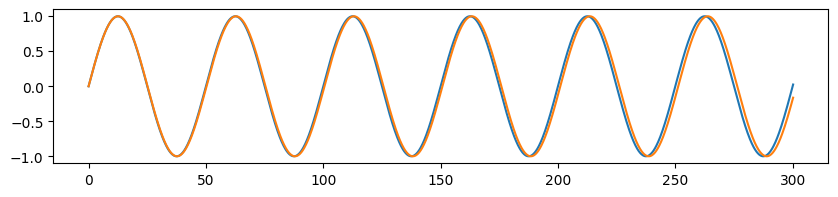

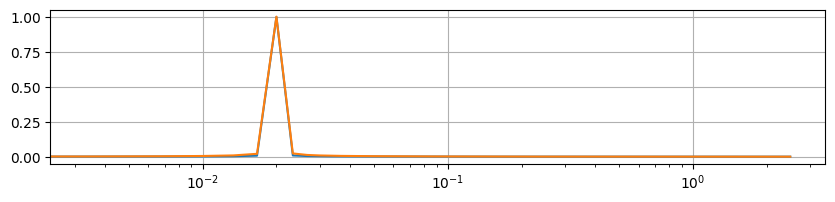

In [4]:
plt.figure(figsize=(10,2))

fs = 5
N = 1501
T = 1.0 / fs
x = np.linspace(0, N/fs, N)

freq1 = 0.02
freq2 = freq1 - 0.0001

y1 = np.sin(x * 2 * np.pi * freq1)
y2 = np.sin(x * 2 * np.pi * freq2)

# fft
y1_fft = fft.fft(y1)
x_fft = fft.fftfreq(N, T)[:N//2]
y2_fft = fft.fft(y2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

plt.figure(figsize=(10,2))

plt.plot(x_fft, 2.0/N * np.abs(y1_fft[0:N//2]))
plt.plot(x_fft, 2.0/N * np.abs(y2_fft[0:N//2]))
plt.xscale('log')
plt.grid()
plt.show()

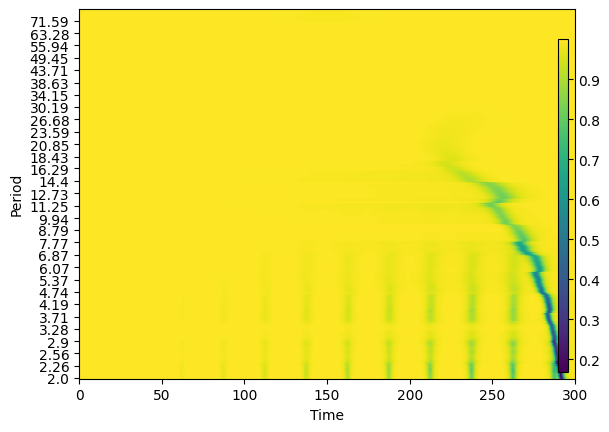

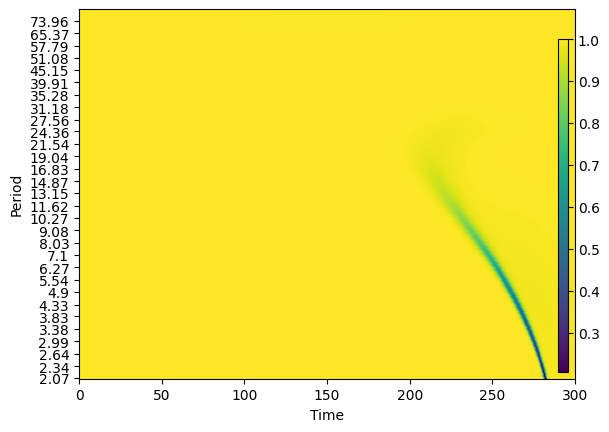

In [17]:
wavelet_name = 'cmor2-1'
tracer_pywt = dict(name='pywt')

wct_pywt, times, freqs_pywt, coif_pywt = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name=wavelet_name,
    normalize=True,
    smoothing_params=dict(smooth_factor=0),
    tracer=tracer_pywt
)

tracer_pycwt = dict(name='pywt')
wct_pycwt, aWCT_pycwt, coi_pycwt, freqs_pycwt, significance_pycwt = pycwt.wct(y1, y2, dt=1/fs, sig=False, tracer=tracer_pycwt)

tracers = [tracer_pywt, tracer_pycwt]

hypyp.plots.spectrogram_plot_period(np.abs(wct_pywt), times, freqs_pywt, coif_pywt)
hypyp.plots.spectrogram_plot_period(np.abs(wct_pycwt), times, freqs_pycwt, coif_pywt)

#get_frequencies(wavelet_name, freqs_pywt, T)

plt.show()

